In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

import sys; sys.path.append('../../')
from funcs.xarray_tools import find_cor_ts

from funcs.plotting import map_grid_clean, plt_lc, add_interval
from funcs.snotel import clean_snotel

In [2]:
ds = xr.open_dataset(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsars').joinpath('old/grmesa_v2.nc'))
# ds = ds.sel(x= slice(-108.27,-108), y = slice(39.1, 38.98))
ds = ds.sel(x = slice(-108.265, -108.15),  y = slice(39.096, 38.996))
df = pd.read_csv('/Users/rdcrlzh1/Documents/uavsar-coherence/data/snotel/grmesa/622:CO:SNTL.csv', parse_dates=True, index_col=0)
df = clean_snotel(df)

In [3]:
ts = find_cor_ts(ds)

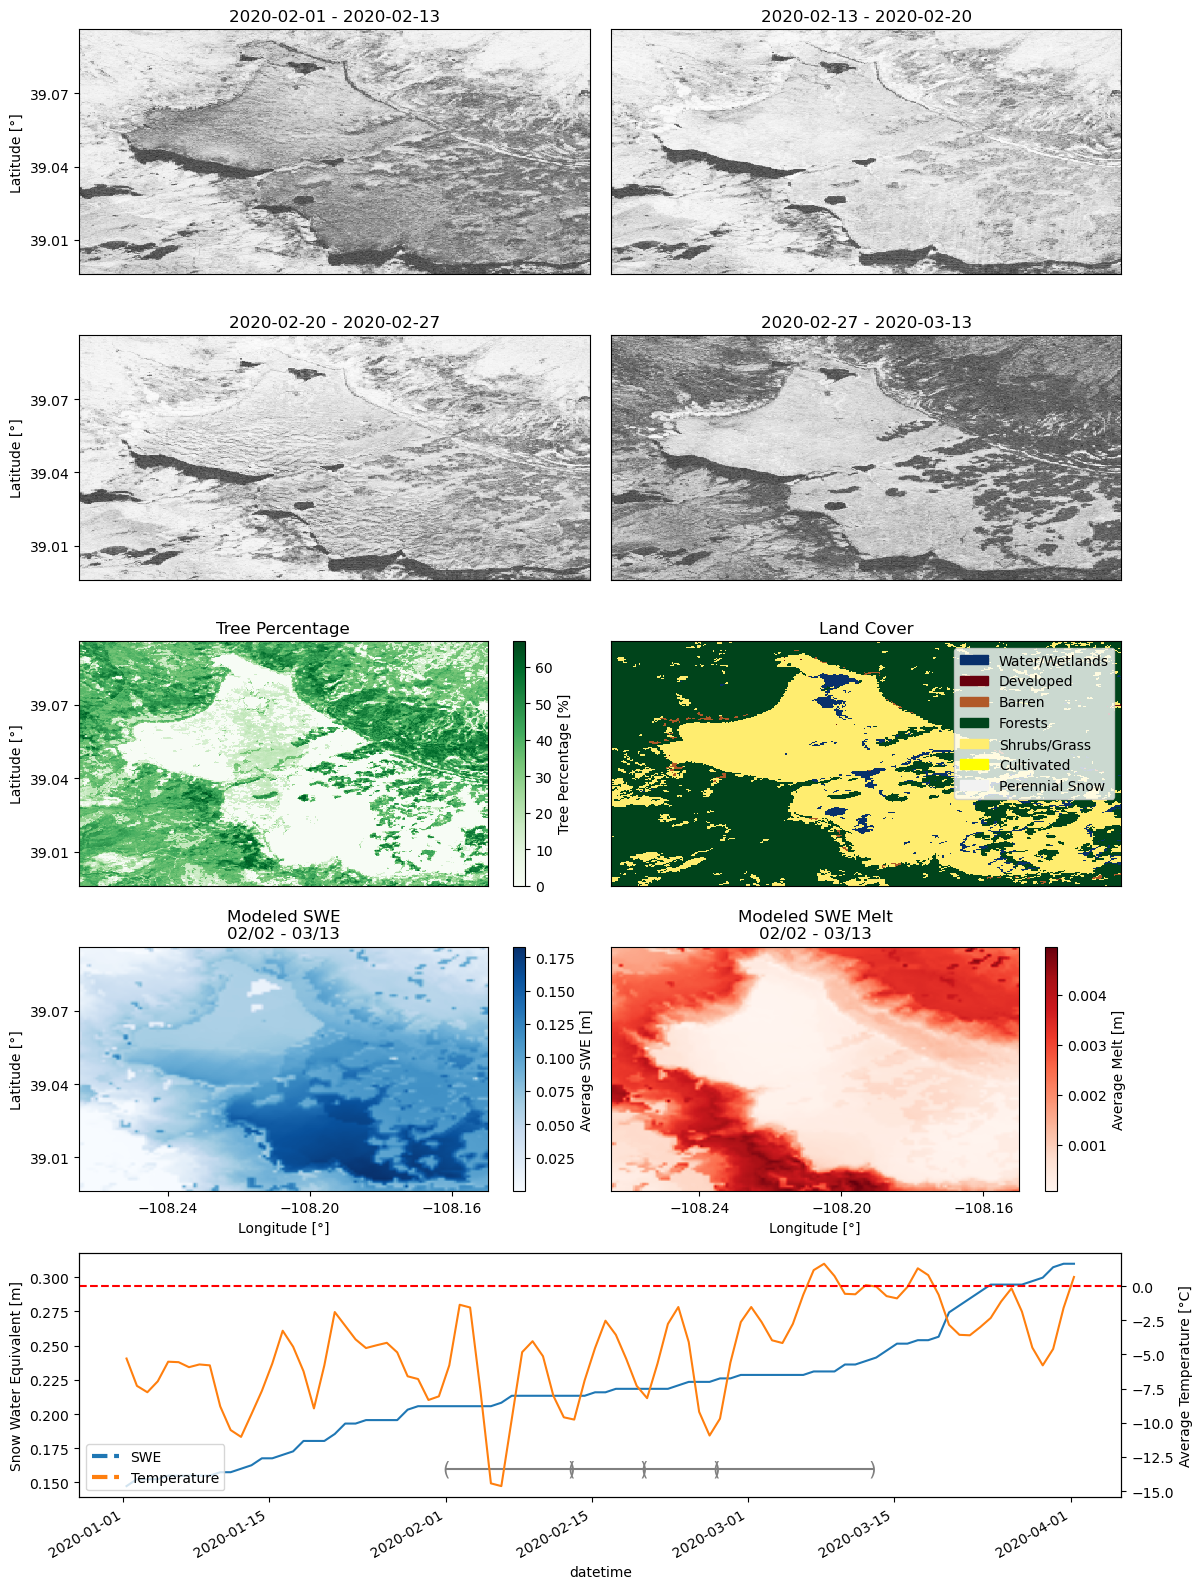

In [27]:
fig, axes = plt.subplots(5,2, figsize = (12, 16))
gs = axes[0, 1].get_gridspec()
for ax in axes[-1, :]: ax.remove()
axbig = fig.add_subplot(gs[-1, :])

for (h, t1, t2), ax in zip(ts[:4], axes.ravel()):
    ds.sel(time1 = t1, time2 = t2, pol = 'VV')['cor'].plot(ax = ax, vmin = 0, vmax = 1, cmap = 'Greys_r', add_colorbar = False)
    t1, t2 = [pd.to_datetime(t) for t in [t1, t2]]
    ax.set_title(f"{t1.strftime('%Y-%m-%d')} - {t2.strftime('%Y-%m-%d')}")
    ax.scatter(-108-(3/60), 39 + (3/60), color = 'blue', marker = 'x')
    add_interval(axbig, [t1, t2], [0.16, 0.16], caps="()")

ds['tree_perc'].plot(ax = axes[2, 0], cmap = 'Greens', cbar_kwargs = {'label': 'Tree Percentage [%]'})
plt_lc(ds['land_cover'], ax= axes[2, 1])
# ds['dem'].plot(ax = axes[3, 0])
# ds['inc'].plot(ax = axes[3, 1])
ds['model_swe'].sel(model_time = slice('2020-02-01', '2020-03-13')).mean('model_time').plot(ax = axes[3, 0], cbar_kwargs = {'label': 'Average SWE [m]'}, cmap = 'Blues')
ds['model_melt'].sel(model_time = slice('2020-02-01', '2020-03-13')).mean('model_time').plot(ax = axes[3, 1], cbar_kwargs = {'label': 'Average Melt [m]'}, cmap = 'Reds')

for ax, title in zip(axes[2:4,:].ravel(), ['Tree Percentage', 'Land Cover', 'Modeled SWE\n02/02 - 03/13', 'Modeled SWE Melt\n02/02 - 03/13']): ax.set_title(title)
map_grid_clean(axes[:4,:])


df['2020-01-01':'2020-04-01'][['swe']].plot(ax = axbig, legend = False)
axbig_twinx = axbig.twinx()
df['2020-01-01':'2020-04-01'][['temp']].rolling(3, min_periods = 1).mean().plot(ax = axbig_twinx, legend = False, color = 'C1')
axbig_twinx.axhline(0, color = 'red', linestyle = '--')

from matplotlib.lines import Line2D
colors = ['C0', 'C1']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['SWE', 'Temperature']
plt.legend(lines, labels)

axbig_twinx.set_ylabel('Average Temperature [°C]')
axbig.set_ylabel('Snow Water Equivalent [m]')

plt.tight_layout()
fig_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/figures/examples')
plt.savefig(fig_dir.joinpath('2020-grmesa.png'))

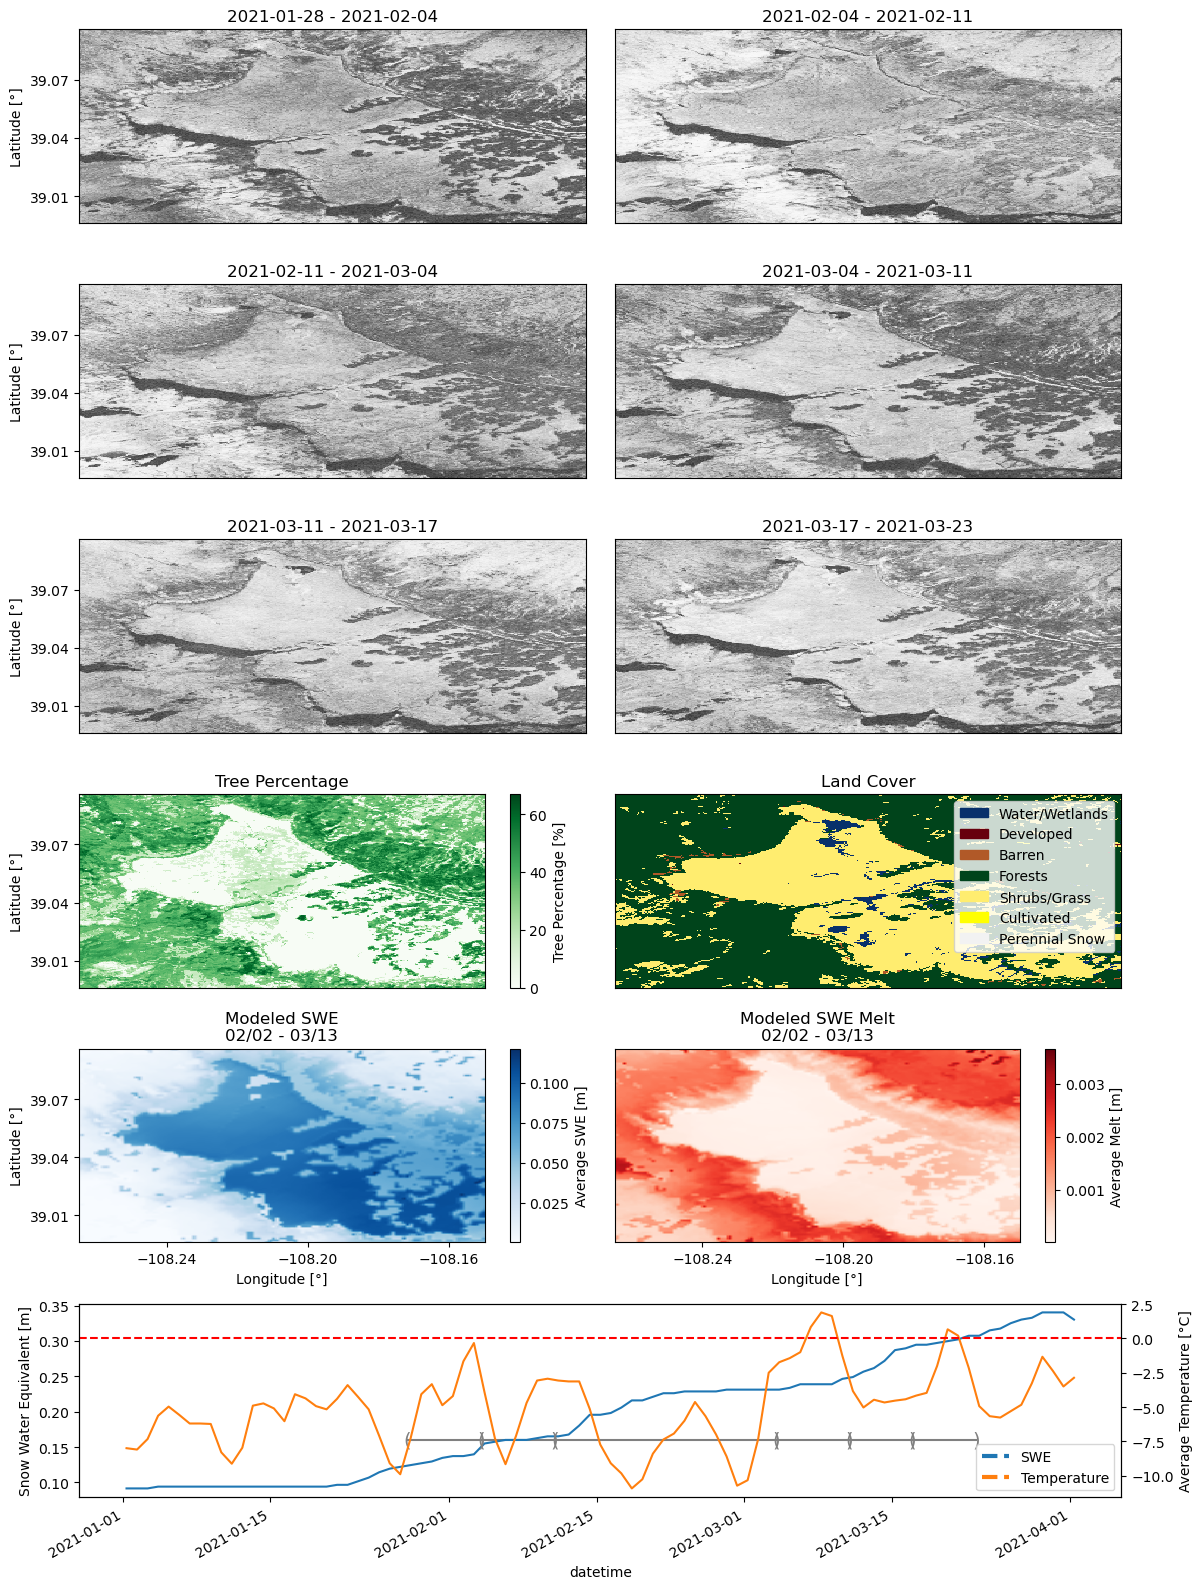

In [25]:
fig, axes = plt.subplots(6,2, figsize = (12, 16))
gs = axes[0, 1].get_gridspec()
for ax in axes[-1, :]: ax.remove()
axbig = fig.add_subplot(gs[-1, :])

for (h, t1, t2), ax in zip(ts[4:], axes.ravel()):
    ds.sel(time1 = t1, time2 = t2, pol = 'VV')['cor'].plot(ax = ax, vmin = 0, vmax = 1, cmap = 'Greys_r', add_colorbar = False)
    t1, t2 = [pd.to_datetime(t) for t in [t1, t2]]
    ax.set_title(f"{t1.strftime('%Y-%m-%d')} - {t2.strftime('%Y-%m-%d')}")
    ax.scatter(-108-(3/60), 39 + (3/60), color = 'blue', marker = 'x')
    add_interval(axbig, [t1, t2], [0.16, 0.16], caps="()")

ds['tree_perc'].plot(ax = axes[3, 0], cmap = 'Greens', cbar_kwargs = {'label':'Tree Percentage [%]'})
plt_lc(ds['land_cover'], ax= axes[3, 1])
# ds['dem'].plot(ax = axes[3, 0])
# ds['inc'].plot(ax = axes[3, 1])
ds['model_swe'].sel(model_time = slice('2021-01-28', '2021-03-23')).mean('model_time').plot(ax = axes[4, 0], cbar_kwargs = {'label': 'Average SWE [m]'}, cmap = 'Blues')
ds['model_melt'].sel(model_time = slice('2021-01-28', '2021-03-23')).mean('model_time').plot(ax = axes[4, 1], cbar_kwargs = {'label': 'Average Melt [m]'}, cmap = 'Reds')

for ax, title in zip(axes[3:5,:].ravel(), ['Tree Percentage', 'Land Cover', 'Modeled SWE\n02/02 - 03/13', 'Modeled SWE Melt\n02/02 - 03/13']): ax.set_title(title)
map_grid_clean(axes[:-1,:])


df['2021-01-01':'2021-04-01'][['swe']].plot(ax = axbig, legend = False)
axbig_twinx = axbig.twinx()
df['2021-01-01':'2021-04-01'][['temp']].rolling(3, min_periods = 1).mean().plot(ax = axbig_twinx, legend = False, color = 'C1')
axbig_twinx.axhline(0, color = 'red', linestyle = '--')

from matplotlib.lines import Line2D
colors = ['C0', 'C1']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='--') for c in colors]
labels = ['SWE', 'Temperature']
plt.legend(lines, labels)

axbig_twinx.set_ylabel('Average Temperature [°C]')
axbig.set_ylabel('Snow Water Equivalent [m]')

plt.tight_layout()
fig_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/figures/examples')
plt.savefig(fig_dir.joinpath('2021-grmesa.png'))